In [1]:
from bidict import bidict
from collections import defaultdict
import itertools
import os
import pandas as pd
import pickle
import lzma

from conllu import parse, parse_incr
import numpy as np
from cp_orth import orth_als
import sktensor

from decomp_pmi import VerbTensor

import matplotlib.pyplot as plt
%pylab inline

DEBUG    [415] CACHEDIR=/home/makrai/.cache/matplotlib
DEBUG    [1362] Using fontManager instance from /home/makrai/.cache/matplotlib/fontlist-v300.json
DEBUG    [211] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG    [211] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG    [211] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (10, 6)

In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)-8s [%(lineno)d] %(message)s')

In [18]:
matplotlib.rcParams.update({'font.size': 14})

# DepCC

In [22]:
svo_count = pd.read_csv('/mnt/permanent/home/makrai/project/verb-tensor/just_svo/dataframe/depCC/freq.tsv', 
                        sep='\t')

In [23]:
svo_count.head()#sort_values('freq', ascending=False).head()

,nsubj,ROOT,dobj,freq
0,we,support,browser,31888
1,we,reserve,right,19810
2,I,have,idea,14807
3,I,love,it,11836
4,WebMD,disclaim,warranty,11386


In [6]:
svo_count = VerbTensor().append_pmi()

INFO     [33] Reading freqs from /mnt/store/home/makrai/project/verb-tensor/just_svo/dataframe/depCC/freq0.tsv
INFO     [35] Computing marginals..
DEBUG    [43] ('nsubj', 'ROOT')
DEBUG    [43] ('nsubj', 'dobj')
DEBUG    [43] ('ROOT', 'dobj')
INFO     [46] Computing Dice..
INFO     [55] Computing PMI variants..
INFO     [77] Computing salience..
INFO     [80] Saving to /mnt/store/home/makrai/project/verb-tensor/just_svo/dataframe/depCC/assoc0.{}..


In [7]:
svo_count.describe(percentiles=[])

,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_freq,log_dice,pmi,iact_info,salience,iact_sali
count,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06,1.692108e+06
mean,2.398524e+00,-1.072292e+01,-8.880588e+00,-1.379939e+01,-1.636223e+01,-1.968974e+01,-1.909260e+01,-2.159658e+01,-1.425194e+01,1.184615e+01,4.333825e+01,-2.574436e+02,-9.376328e+02
std,4.230654e+01,7.121997e+00,4.327220e+00,4.111304e+00,5.315663e+00,3.100756e+00,3.264208e+00,8.921435e-01,3.491087e+00,8.512593e+00,4.501272e+00,1.862613e+02,1.153206e+02
min,1.000000e+00,-2.195254e+01,-2.195254e+01,-2.195254e+01,-2.195254e+01,-2.195254e+01,-2.195254e+01,-2.195254e+01,-1.924395e+01,0.000000e+00,8.811229e+00,-9.638278e+02,-1.332283e+03
50%,1.000000e+00,-1.059719e+01,-8.615752e+00,-1.306989e+01,-1.742898e+01,-2.195254e+01,-2.036757e+01,-2.195254e+01,-1.497822e+01,1.037613e+01,4.403182e+01,-2.255054e+02,-9.623692e+02
max,3.229400e+04,-2.070400e+00,-2.180919e+00,-5.971505e+00,-3.854598e+00,-6.899375e+00,-6.972799e+00,-6.973559e+00,0.000000e+00,4.390507e+01,6.068924e+01,-0.000000e+00,-7.465874e+01


In [8]:
svo_count[svo_count.freq>-1].sort_values('pmi', ascending=False).head()

,nsubj,ROOT,dobj,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_freq,log_dice,pmi,iact_info,salience,iact_sali
605793,Zljbtgyttdtmc,ffehuatwnhalptekpylwzae,efda,1,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,0.0,43.905074,21.952537,-963.827781,-481.91389
505764,@hurley,@youngwisetails,#youngwisetails,1,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,0.0,43.905074,21.952537,-963.827781,-481.91389
1320037,nepravilnus,grumeni,strukturu,1,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,0.0,43.905074,21.952537,-963.827781,-481.91389
753246,yajy1i,tyii,DUT,1,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,0.0,43.905074,21.952537,-963.827781,-481.91389
1495507,Avalikud,konsultatsioonid,konsulteerimistegevus,1,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,-21.952537,0.0,43.905074,21.952537,-963.827781,-481.91389


DEBUG    [2515] update_title_pos
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0, 700000.0, 800000.0, 900000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0]
DEBUG    [1254] findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 

DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0, 700000.0, 800000.0, 900000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0]
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e

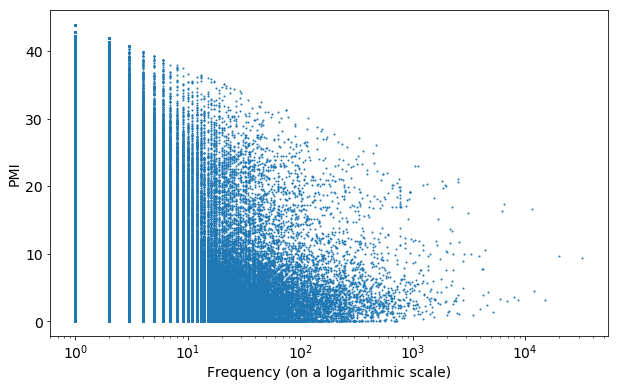

In [19]:
_ = plt.scatter(svo_count.freq, svo_count.pmi, s=1)
plt.xscale('log')
plt.xlabel('Frequency (on a logarithmic scale)')
plt.ylabel('PMI')
plt.savefig('/home/makrai/repo/paper/EurNLP/verbtensor/img/plot-pmi.png')

In [10]:
svo_count[svo_count.freq>2].sort_values('iact_info', ascending=False).head()

,nsubj,ROOT,dobj,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_freq,log_dice,pmi,iact_info,salience,iact_sali
109290,it,marry,best,4,-3.753838,-8.309696,-10.158528,-18.493106,-15.033674,-19.952537,-19.952537,-14.690048,2.269524,51.209793,-45.282765,-1021.765294
132981,California,spend,something,3,-12.644198,-8.487609,-8.385294,-20.367575,-19.952537,-19.952537,-20.367575,-11.385563,9.149526,51.123123,-186.353659,-1041.254026
158996,everybody,go,post,3,-10.388388,-9.360314,-9.233362,-18.952537,-20.367575,-20.367575,-20.367575,-10.790982,8.614489,51.073198,-175.456251,-1040.237167
155366,what,support,shape,3,-7.881242,-6.476519,-11.992535,-18.045647,-18.952537,-19.952537,-20.367575,-12.791050,5.982722,50.967999,-121.853536,-1038.094531
148343,I,disclaim,liability,3,-2.070400,-8.391488,-12.014428,-18.493106,-17.252098,-17.045647,-20.367575,-16.731590,2.108741,50.682108,-42.949948,-1032.271629


DEBUG    [2515] update_title_pos
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0, 700000.0, 800000.0, 900000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0]
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.

DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0, 700000.0, 800000.0, 900000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0]
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e

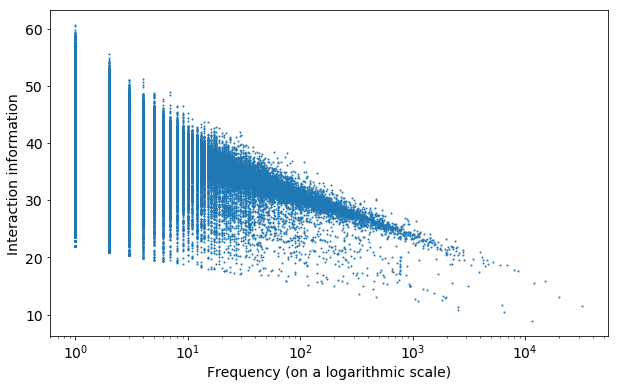

In [20]:
_ = plt.scatter(svo_count.freq, svo_count.iact_info, s=1)
plt.xscale('log')
plt.xlabel('Frequency (on a logarithmic scale)')
plt.ylabel('Interaction information')
plt.savefig('/home/makrai/repo/paper/EurNLP/verbtensor/img/plot-iact.png')

In [12]:
svo_count[svo_count.freq>20].sort_values('log_dice', ascending=False).head()

,nsubj,ROOT,dobj,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_freq,log_dice,pmi,iact_info,salience,iact_sali
15533,по,прошествии,eshopworld,21,-17.560220,-17.560220,-17.560220,-17.560220,-17.560220,-17.560220,-17.560220,0.000000,35.120440,17.560220,-616.722639,-308.361319
15221,Visas,tiesības,aizsargātas,21,-17.560220,-17.560220,-17.560220,-17.560220,-17.560220,-17.560220,-17.560220,0.000000,35.120440,17.560220,-616.722639,-308.361319
417,ISPE,s.r.l.,Palazzolo,467,-13.082173,-13.079093,-13.085258,-13.085258,-13.085258,-13.085258,-13.085258,-0.003086,26.161266,13.094510,-342.326923,-171.345046
2266,Possono,essere,applicatus,117,-15.069894,-15.057719,-15.082173,-15.069894,-15.082173,-15.082173,-15.082173,-0.012278,30.127614,15.106626,-454.389866,-227.840732
10740,actividade,turísticas,cercana,29,-17.094556,-17.094556,-17.045647,-17.094556,-17.094556,-17.094556,-17.094556,-0.016488,34.140203,17.143466,-583.611617,-293.059941


DEBUG    [2515] update_title_pos
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0, 700000.0, 800000.0, 900000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0]
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.

DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 200000.0, 300000.0, 400000.0, 500000.0, 600000.0, 700000.0, 800000.0, 900000.0, 2000000.0, 3000000.0, 4000000.0, 5000000.0, 6000000.0, 7000000.0, 8000000.0, 9000000.0]
DEBUG    [2157] vmin 0.5944770781820387 vmax 54274.69755089304
DEBUG    [2212] ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e

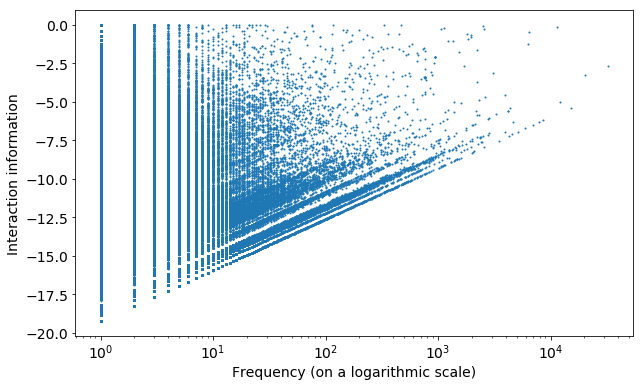

In [21]:
_ = plt.scatter(svo_count.freq, svo_count.log_dice, s=1)
plt.xscale('log')
plt.xlabel('Frequency (on a logarithmic scale)')
plt.ylabel('Interaction information')
plt.savefig('/home/makrai/repo/paper/EurNLP/verbtensor/img/plot-log-dice.png')

In [13]:
svo_count.sort_values('salience', ascending=False).head()

,nsubj,ROOT,dobj,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_freq,log_dice,pmi,iact_info,salience,iact_sali
1692107,I,get,mechanic,1,-2.070400,-5.717738,-13.952537,-7.138606,-15.723719,-21.952537,-21.952537,-18.408302,0.0,45.026723,-0.0,-988.450808
159681,we,love,balcony,3,-2.938699,-4.806953,-12.501326,-8.434007,-15.543146,-18.782612,-20.367575,-16.194667,0.0,42.880361,-0.0,-873.368966
821032,you,have,simulation,1,-4.799272,-2.180919,-13.833596,-6.530571,-19.630609,-18.782612,-21.952537,-18.404711,0.0,46.082542,-0.0,-1011.628729
1431139,she,have,ready,1,-5.296923,-2.180919,-14.390295,-7.263741,-19.367575,-16.908143,-21.952537,-18.344416,0.0,43.623859,-0.0,-957.654396
821012,I,bring,memory,1,-2.070400,-8.796612,-10.260794,-12.319542,-11.316819,-16.397948,-21.952537,-18.315621,0.0,40.859041,-0.0,-896.959610


In [14]:
svo_count[svo_count.freq>=0].sort_values('iact_sali', ascending=False).head()

,nsubj,ROOT,dobj,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_freq,log_dice,pmi,iact_info,salience,iact_sali
4,WebMD,disclaim,warranty,11421,-8.366401,-8.391488,-8.302607,-8.473136,-8.473136,-8.452318,-8.473136,-0.120124,16.587361,8.811229,-140.546961,-74.658738
0,we,support,browser,32294,-2.938699,-6.476519,-6.956284,-6.891841,-6.973067,-6.972799,-6.973559,-2.648824,9.397944,11.439764,-65.537114,-79.775867
8,Med,help,provider,6494,-9.285869,-8.252639,-9.199320,-9.287423,-9.287646,-9.287646,-9.287646,-0.455400,17.450184,10.412531,-162.071122,-96.707895
1,we,reserve,right,20113,-2.938699,-7.498688,-6.950250,-7.649613,-7.580080,-7.534751,-7.656697,-3.276292,9.730940,13.033503,-74.506857,-99.793580
9,S&P,/,Indices,6269,-9.316592,-7.013233,-9.338057,-9.338057,-9.338518,-9.338518,-9.338518,-1.228003,16.329366,11.685727,-152.492069,-109.127366
